In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings("ignore")

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


In [3]:
titanic.shape

(1309, 12)

In [4]:
titanic.isnull().sum(axis = 0)

PassengerId      0
Survived       418
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [5]:
titanic = titanic.dropna()
titanic = titanic.drop(columns=["PassengerId", "Cabin", "Name", "Ticket", "SibSp"], axis=1)

In [6]:
titanic.head()

,Survived,Pclass,Gender,Age,Parch,Fare,Embarked
0,0.0,3,male,22.0,0,7.2500,S
1,1.0,1,female,38.0,0,71.2833,C
2,1.0,3,female,26.0,0,7.9250,S
3,1.0,1,female,35.0,0,53.1000,S
4,0.0,3,male,35.0,0,8.0500,S


In [7]:
titanic_encoded = pd.get_dummies(titanic, columns=['Pclass', 'Gender', 'Embarked'], drop_first=True)
# titanic_encoded = pd.get_dummies(titanic, columns=['Pclass', 'Gender', 'Embarked'])
titanic_encoded.head()

,Survived,Age,Parch,Fare,Pclass_2,Pclass_3,Gender_male,Embarked_Q,Embarked_S
0,0.0,22.0,0,7.2500,0,1,1,0,1
1,1.0,38.0,0,71.2833,0,0,0,0,0
2,1.0,26.0,0,7.9250,0,1,0,0,1
3,1.0,35.0,0,53.1000,0,0,0,0,1
4,0.0,35.0,0,8.0500,0,1,1,0,1


In [8]:
y = pd.DataFrame(titanic_encoded['Survived'])
X = titanic_encoded.drop(['Survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
scaler = Normalizer().fit(X_train[['Age', 'Fare']])

In [10]:
train_scaled = scaler.transform(X_train[['Age', 'Fare']])
X_train_categoricals = X_train.drop(['Age', 'Fare'], axis=1)

train_scaled = pd.DataFrame(train_scaled).reset_index(drop=True)
X_train_categoricals = X_train_categoricals.reset_index(drop=True)

train_data = pd.concat([train_scaled, X_train_categoricals], axis=1)

In [11]:
test_scaled = scaler.transform(X_test[['Age', 'Fare']])
X_test_categoricals = X_test.drop(['Age', 'Fare'], axis=1)

test_scaled = pd.DataFrame(test_scaled).reset_index(drop=True)
X_test_categoricals = X_test_categoricals.reset_index(drop=True)

test_data = pd.concat([test_scaled, X_test_categoricals], axis=1)

In [12]:
model = LogisticRegression(solver='lbfgs',multi_class='ovr')
model = model.fit(train_data, y_train)

In [13]:
model.score(test_data, y_test)

0.7873134328358209

In [14]:
y_predictions = model.predict(test_data)
y_predictions[:10]

array([0., 0., 0., 0., 1., 1., 0., 0., 0., 1.])

In [15]:
model.predict_proba(test_data)

array([[0.93616064, 0.06383936],
       [0.91057243, 0.08942757],
       [0.91646566, 0.08353434],
       [0.92476219, 0.07523781],
       [0.24073741, 0.75926259],
       [0.12853272, 0.87146728],
       [0.90481261, 0.09518739],
       [0.91633365, 0.08366635],
       [0.8689684 , 0.1310316 ],
       [0.44831957, 0.55168043],
       [0.72578796, 0.27421204],
       [0.46331708, 0.53668292],
       [0.82440708, 0.17559292],
       [0.49429132, 0.50570868],
       [0.34826825, 0.65173175],
       [0.10340681, 0.89659319],
       [0.79780704, 0.20219296],
       [0.88664545, 0.11335455],
       [0.92537254, 0.07462746],
       [0.90958182, 0.09041818],
       [0.91897866, 0.08102134],
       [0.90716747, 0.09283253],
       [0.17562221, 0.82437779],
       [0.70786943, 0.29213057],
       [0.34741392, 0.65258608],
       [0.90574619, 0.09425381],
       [0.89825413, 0.10174587],
       [0.59622861, 0.40377139],
       [0.91714964, 0.08285036],
       [0.59890022, 0.40109978],
       [0.

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(y_test, y_predictions)

array([[147,  26],
       [ 31,  64]])

In [20]:
(147+64)/(147+64+26+31)

0.7873134328358209

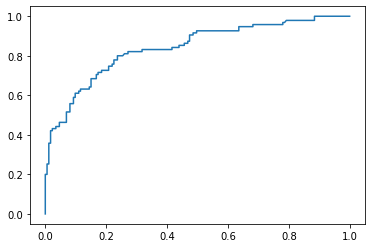

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_proba = model.predict_proba(test_data)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr)
plt.show()